In [4]:
import satpy
import matplotlib.pyplot as plt
from satpy import Scene, MultiScene
from pyresample.geometry import AreaDefinition
import xarray as xr
import warnings
warnings.filterwarnings("ignore")

In [5]:
#scn  = satpy.Scene(reader='seviri_l1b_native', filenames=['C:/Users/yaron/Downloads/jm_YZ9Sfjg6wUmJogA/MSG1-SEVI-MSG15-0201-NA-20060402135740.833000000Z-NA/MSG1-SEVI-MSG15-0201-NA-20060402135740.833000000Z-NA.nat'])
scn  = satpy.Scene(reader='seviri_l1b_native', filenames=['MSG2-SEVI-MSG15-0100-NA-20101202201242.047000000Z-NA.nat'])
scn.available_composite_names()


['airmass',
 'ash',
 'cloudtop',
 'cloudtop_daytime',
 'colorized_ir_clouds',
 'convection',
 'day_microphysics',
 'day_microphysics_winter',
 'dust',
 'fog',
 'green_snow',
 'hrv_clouds',
 'hrv_fog',
 'hrv_severe_storms',
 'hrv_severe_storms_masked',
 'ir108_3d',
 'ir_cloud_day',
 'ir_overview',
 'ir_sandwich',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'natural_color_with_night_ir',
 'natural_color_with_night_ir_hires',
 'natural_enh',
 'natural_with_night_fog',
 'night_fog',
 'night_ir_alpha',
 'night_ir_with_background',
 'night_ir_with_background_hires',
 'night_microphysics',
 'overview',
 'overview_raw',
 'realistic_colors',
 'snow',
 'vis_sharpened_ir']

In [25]:
print(scn)# print metadata 


<xarray.DataArray 'reshape-4254e28c630d25f5405245067d4907b7' (y: 3712, x: 3712)>
dask.array<truediv, shape=(3712, 3712), dtype=float32, chunksize=(3712, 3712), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT NaT ... NaT NaT NaT NaT NaT
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 -5.567e+06 -5.564e+06 ... 5.564e+06 5.567e+06
  * x         (x) float64 5.567e+06 5.564e+06 ... -5.564e+06 -5.567e+06
Attributes: (12/17)
    orbital_parameters:       {'projection_longitude': 0.0, 'projection_latit...
    units:                    K
    wavelength:               10.8 µm (9.8-11.8 µm)
    standard_name:            toa_brightness_temperature
    platform_name:            Meteosat-9
    sensor:                   seviri
    ...                       ...
    name:                     IR_108
    resolution:               3000.403165817
    calibration:              brightness_temperature
    mod

In [4]:
composite = ['ash',"night_microphysics"]
#scn.load([composite])
scn.load(["IR_097","IR_108","IR_039","ash","night_microphysics"])


In [5]:
scn.keys()#satpy give the The highest calibration as default ,for VIS006 we wil get reflectivity
#can also use  Planck's law to to to  calculation brightness temperature ourself in the Appropriate channels
#reflectivity is more complex

[DataID(name='IR_039', wavelength=WavelengthRange(min=3.48, central=3.92, max=4.36, unit='µm'), resolution=3000.403165817, calibration=<calibration.brightness_temperature>, modifiers=()),
 DataID(name='IR_097', wavelength=WavelengthRange(min=9.38, central=9.66, max=9.94, unit='µm'), resolution=3000.403165817, calibration=<calibration.brightness_temperature>, modifiers=()),
 DataID(name='IR_108', wavelength=WavelengthRange(min=9.8, central=10.8, max=11.8, unit='µm'), resolution=3000.403165817, calibration=<calibration.brightness_temperature>, modifiers=()),
 DataID(name='ash', resolution=3000.403165817),
 DataID(name='night_microphysics', resolution=3000.403165817)]

Area ID: iseral
Description: iseral;
Projection ID: Geographical Coordinate System clipped on iseral
Projection: {'datum': 'WGS84', 'no_defs': 'None', 'proj': 'longlat', 'type': 'crs'}
Number of columns: 1000
Number of rows: 1000
Area extent: (32, 31, 37, 36)


Could not calculate destination definition resolution


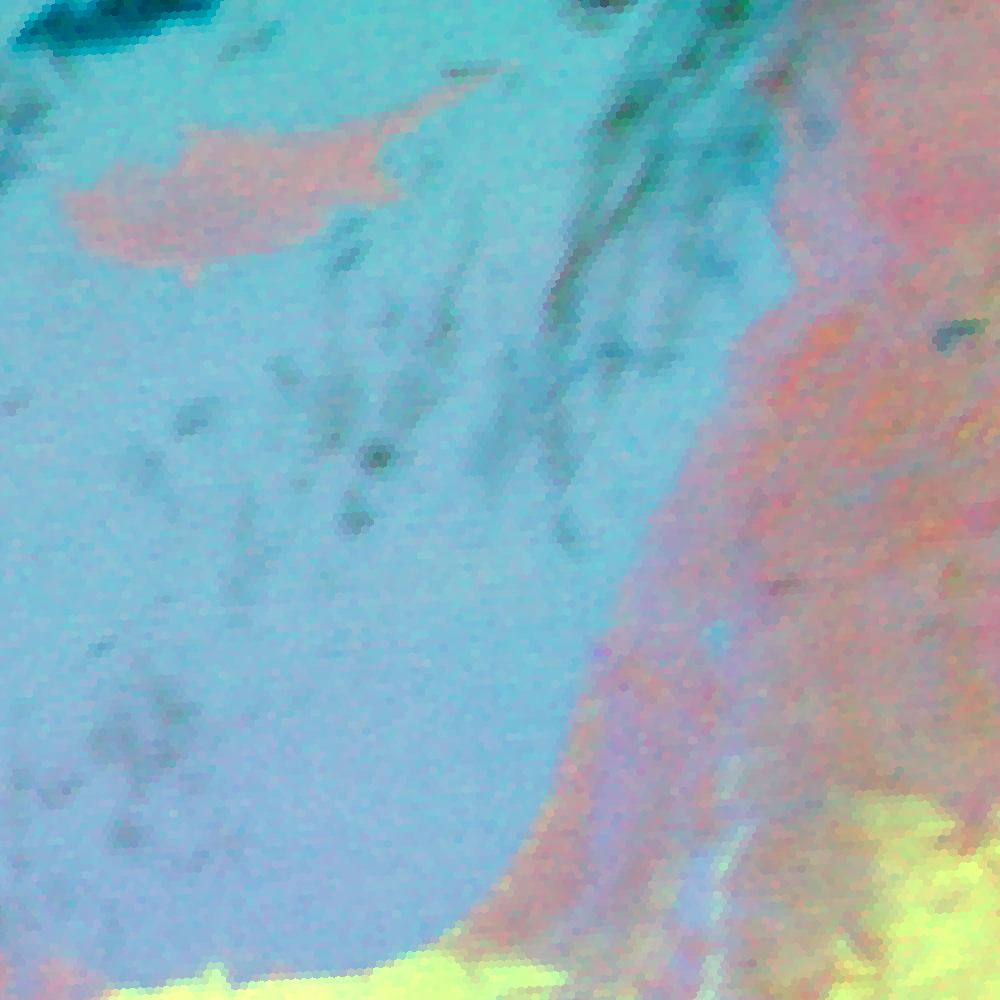

In [6]:
#crop for iseral zone

area_id = "iseral"
description = "Geographical Coordinate System clipped on iseral"
proj_id = "iseral;"
# specifing some parameters of the projection
proj_dict = {"proj": "longlat", "ellps": "WGS84", "datum":  "WGS84"}
llx = 32 # lower left x coordinate in degrees
lly = 31 # lower left y coordinate in degrees
urx = 37 # upper right x coordinate in degrees
ury = 36 # upper right y coordinate in degrees
resolution = 0.005 # target resolution in degrees
# calculating the number of pixels
width = int((urx - llx) / resolution)
height = int((ury - lly) / resolution)
area_extent = (llx,lly,urx,ury)
# defining the area
area_def = AreaDefinition(area_id, proj_id, description, proj_dict, width, height, area_extent)
print(area_def)

local_scn = scn.resample(area_def)
local_scn.show("ash")#just to view
#Ash is an RGB composite based upon infrared channel data from the 
#Meteosat Second Generation satellite. It is designed to detect ash and sulphur dioxide (SO2)
#from volcanic eruptions which can be used for the provision of warnings to aviation authorities. 
#The Ash RGB is composed from data from a combination of the SEVIRI IR8.7, IR10.8 and IR12.0 channels.
#need to see why "Could not calculate destination definition resolution"

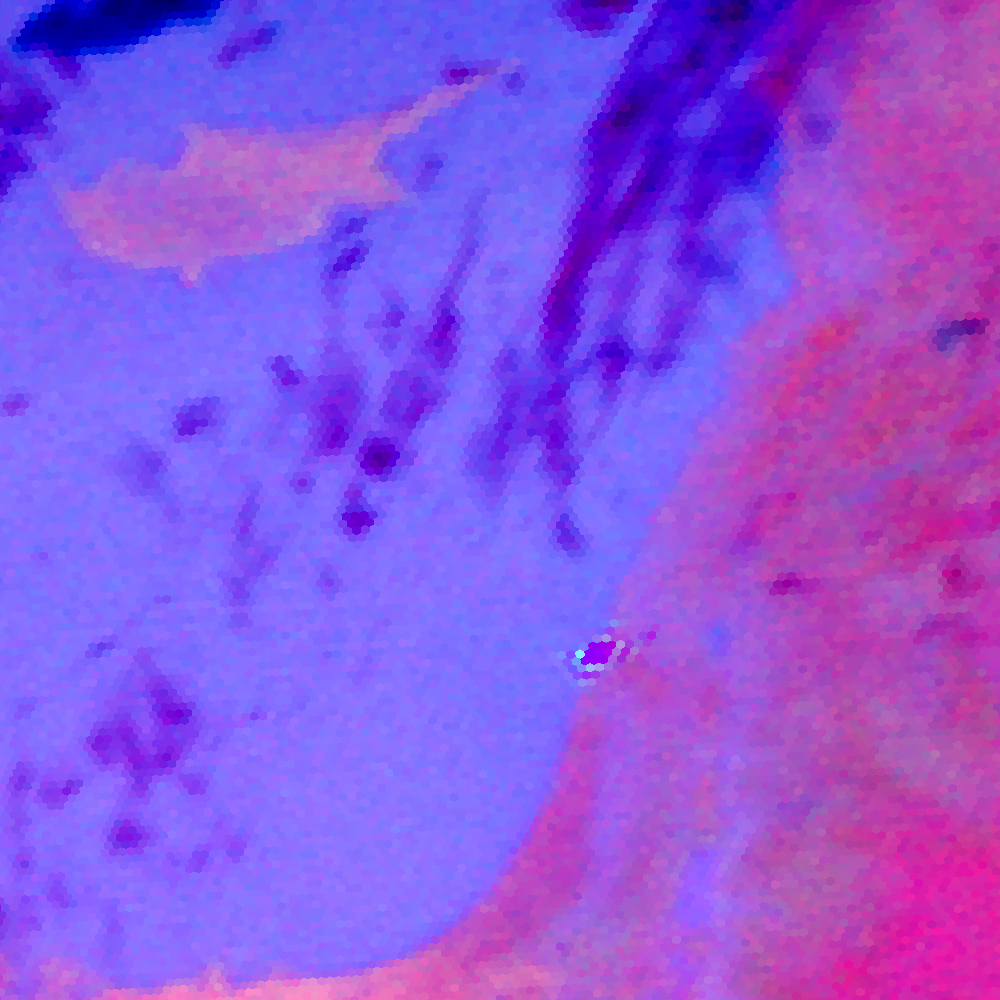

In [7]:


local_scn = scn.resample(area_def)
local_scn.show("night_microphysics")#
"""
can also use to gain on wildfire see
eumetsat.int/catastrophic-fires-oregon-and-california
It was reported that 1,000,000 acres were burned, and about 40,000 people were evacuated, with a further 500,000 people in evacuation warning areas.
While the impact of the 2020 fires on atmospheric composition is discussed in this California fires case study, this case focuses on the night-time view of the fires and smoke, with emphasis on the interpretation of the Night Microphysics RGB. This RGB gives the best combined view of high, mid and low clouds, cloud microphysics (to a degree), fires, smoke (when the smoke is thick and high enough) and moisture boundaries.
The GOES-17 Night Microphysics RGB with 500 hPa absolute topography overlaid (Figure 1)
shows the synoptic situation that led to the strong intensification of the fires on 8 September.
A sharp upper level trough (see 500 hPa topography) can be seen over the western US. Related to this 
trough, a cold front with strong post-frontal winds travelled southward. High surface winds behind the 
front lifted dust and ash (from still hot burn scars), which can be seen by its magenta colour in the RGB product.
"""




In [22]:
local_scn.save_datasets(writer="cf",
                  datasets=["IR_039","IR_108"],
                  filename="temp___netcdf.nc",
                  base_dir="")

No time dimension in datasets, skipping time bounds creation.


[None, None]

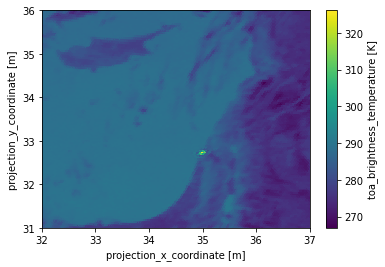

In [24]:
ds= xr.open_dataset("temp___netcdf.nc")
#  The 3.9 µm channel's strong sensitivity to sub-pixel "hot-areas" makes it very useful for fire detection.
ds['IR_039'].plot()#we can see the fire in the Mount Carmel 


In [ ]:
"""
#In order to identify hot spot pixels (potentially active fires)
i apply  the method  based on MSG channels, in particular of the SWIR channel 4 (3.9 μm) and of the TIR channel 9 (10.8 μm).
we working in night so we use 290k ,we skip some part since Due to the close distance to see and lack of time 
see Wildfire Detection and Tracking over Greece Using MSG-SEVIRI Satellite Data

"""
ds= xr.open_dataset("temp.nc")
ds['IR_039'] =ds['IR_039'].where(ds.IR_039 > 290)

ds['fire'] =ds['IR_108'] < ds['IR_039']




In [ ]:
ds.to_netcdf("netcdf_with_wildfire_in_Israel.nc")

In [ ]:
"""
Assuming there was more time and no need to to Check out the students exercises in the
course I am practicing "Remote sensing of soil-plant-atmosphere processes"
1.Preparation of a layer of of Vegetation type usinge free satellite information
2.by usinge the Vegetation type we can gain information on the the Wildfire emissions 
3.of cousres trun the wildfire Pixels into vecotr data
"""